In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ev_data = pd.read_csv('Electric_Vehicle_Population_Data.csv')

In [3]:
ev_data.head(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [4]:
len(ev_data.columns)

17

In [5]:
ev_data.shape

(112634, 17)

In [6]:
ev_data.describe(include='all')

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
count,112634,112634,112634,112634,112634.000000,112634.000000,112634,112614,112634,112634,112634.000000,112634.000000,112348.000000,1.126340e+05,112610,112191,1.126340e+05
unique,7548,165,629,45,NaN,NaN,34,114,2,3,NaN,NaN,NaN,NaN,758,73,NaN
top,5YJYGDEE9M,King,Seattle,WA,NaN,NaN,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,NaN,NaN,NaN,NaN,POINT (-122.13158 47.67858),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),NaN
freq,472,59000,20305,112348,NaN,NaN,52078,23135,86044,58639,NaN,NaN,NaN,NaN,2916,40247,NaN
mean,NaN,NaN,NaN,NaN,98156.226850,2019.003365,NaN,NaN,NaN,NaN,87.812987,1793.439681,29.805604,1.994567e+08,NaN,NaN,5.296650e+10
std,NaN,NaN,NaN,NaN,2648.733064,2.892364,NaN,NaN,NaN,NaN,102.334216,10783.753486,14.700545,9.398427e+07,NaN,NaN,1.699104e+09
min,NaN,NaN,NaN,NaN,1730.000000,1997.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,4.777000e+03,NaN,NaN,1.101001e+09
25%,NaN,NaN,NaN,NaN,98052.000000,2017.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,18.000000,1.484142e+08,NaN,NaN,5.303301e+10
50%,NaN,NaN,NaN,NaN,98119.000000,2020.000000,NaN,NaN,NaN,NaN,32.000000,0.000000,34.000000,1.923896e+08,NaN,NaN,5.303303e+10
75%,NaN,NaN,NaN,NaN,98370.000000,2022.000000,NaN,NaN,NaN,NaN,208.000000,0.000000,43.000000,2.191899e+08,NaN,NaN,5.305307e+10


Checking for Null Values

In [7]:
ev_data.isnull().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                 20
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 286
DOL Vehicle ID                                         0
Vehicle Location                                      24
Electric Utility                                     443
2020 Census Tract                                      0
dtype: int64

In [8]:
ev_data_cleaned = ev_data.dropna()

# 1) Data Exploration

Analyze the EV Adoption Over Time by visualizing the number of EVs registered by model year.

In [9]:
# Model Year: Manufacturing year of the model mentioned in the data set.
ev = ev_data_cleaned["Model Year"].value_counts().sort_index(ascending=True)

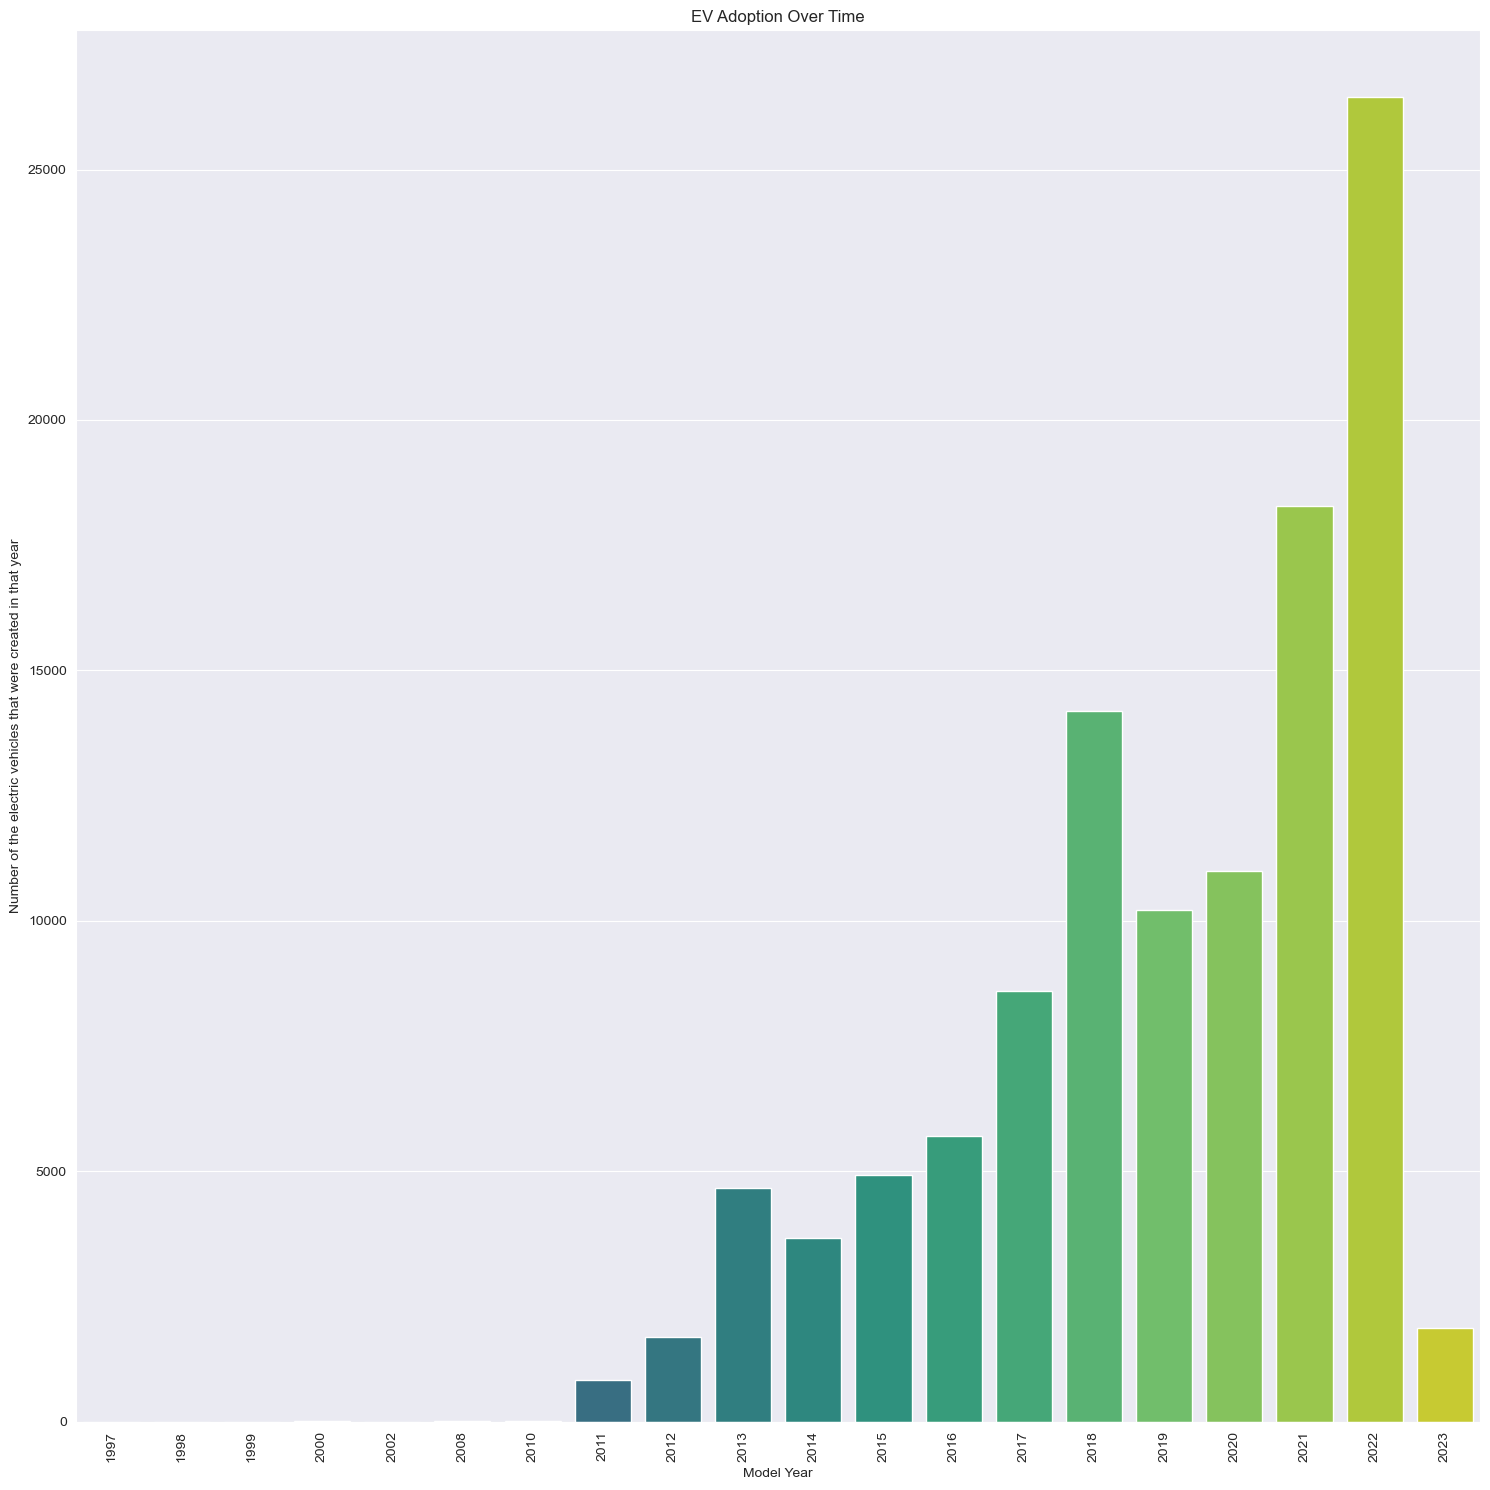

In [10]:
sns.set_style("darkgrid")

# EV Adoption Over Time
plt.figure(figsize=(15,15))
sns.barplot(x = ev.index, y = ev.values, palette='viridis')
plt.title("EV Adoption Over Time")
plt.xlabel("Model Year")
plt.ylabel("Number of the electric vehicles that were created in that year")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

selecting top 3 countries based on EV registrations and analyze the distribution of EVs within the cities of those countries

In [11]:
ev_data_cleaned.head(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500
5,5YJ3E1EB5J,Snohomish,Bothell,WA,98021,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,1.0,475635324,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,53061051916
6,1N4AZ0CP4D,Snohomish,Everett,WA,98203,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,38.0,253546023,POINT (-122.23019 47.94949),PUGET SOUND ENERGY INC,53061040900


In [12]:
ev_data_cleaned['County'].value_counts().head(3).index

Index(['King', 'Snohomish', 'Pierce'], dtype='object', name='County')

In [13]:
# Geographical Distribution at country level
top_ev_country_distribution = ev_data_cleaned['County'].value_counts().head(3).index

In [14]:
top_counties_data = ev_data_cleaned[ev_data_cleaned["County"].isin(top_ev_country_distribution)]

In [15]:
top_counties_data

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500
5,5YJ3E1EB5J,Snohomish,Bothell,WA,98021,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,1.0,475635324,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,53061051916
6,1N4AZ0CP4D,Snohomish,Everett,WA,98203,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,38.0,253546023,POINT (-122.23019 47.94949),PUGET SOUND ENERGY INC,53061040900
7,1N4AZ0CP0D,Snohomish,Mukilteo,WA,98275,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,21.0,176817364,POINT (-122.29196 47.89908),PUGET SOUND ENERGY INC,53061042001
15,1N4BZ1CP4K,Snohomish,Everett,WA,98201,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150,0,38.0,203204347,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061040100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112628,WA1E2AFY7L,King,Seattle,WA,98177,2020,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,32.0,9880104,POINT (-122.36498 47.72238),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033000500
112629,7SAYGDEF2N,King,Duvall,WA,98019,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,45.0,217955265,POINT (-121.98609 47.74068),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033032401
112631,1FMCU0KZ4N,King,Vashon,WA,98070,2022,FORD,ESCAPE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,34.0,193878387,POINT (-122.4573 47.44929),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033027702
112632,KNDCD3LD4J,King,Covington,WA,98042,2018,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,47.0,125039043,POINT (-122.09124 47.33778),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033032007


In [16]:
# analyzing the distribution of EVs within the cities of these top counties
ev_top_city_county = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name="Number of Vehicles")

In [17]:
top_10 = ev_top_city_county.head(10)

In [18]:
top_10

,County,City,Number of Vehicles
0,King,Seattle,20295
1,King,Bellevue,5919
2,King,Redmond,4199
3,King,Kirkland,3598
4,King,Sammamish,3291
5,King,Renton,2777
6,Snohomish,Bothell,2601
7,Pierce,Tacoma,2375
8,King,Issaquah,1789
9,King,Mercer Island,1639


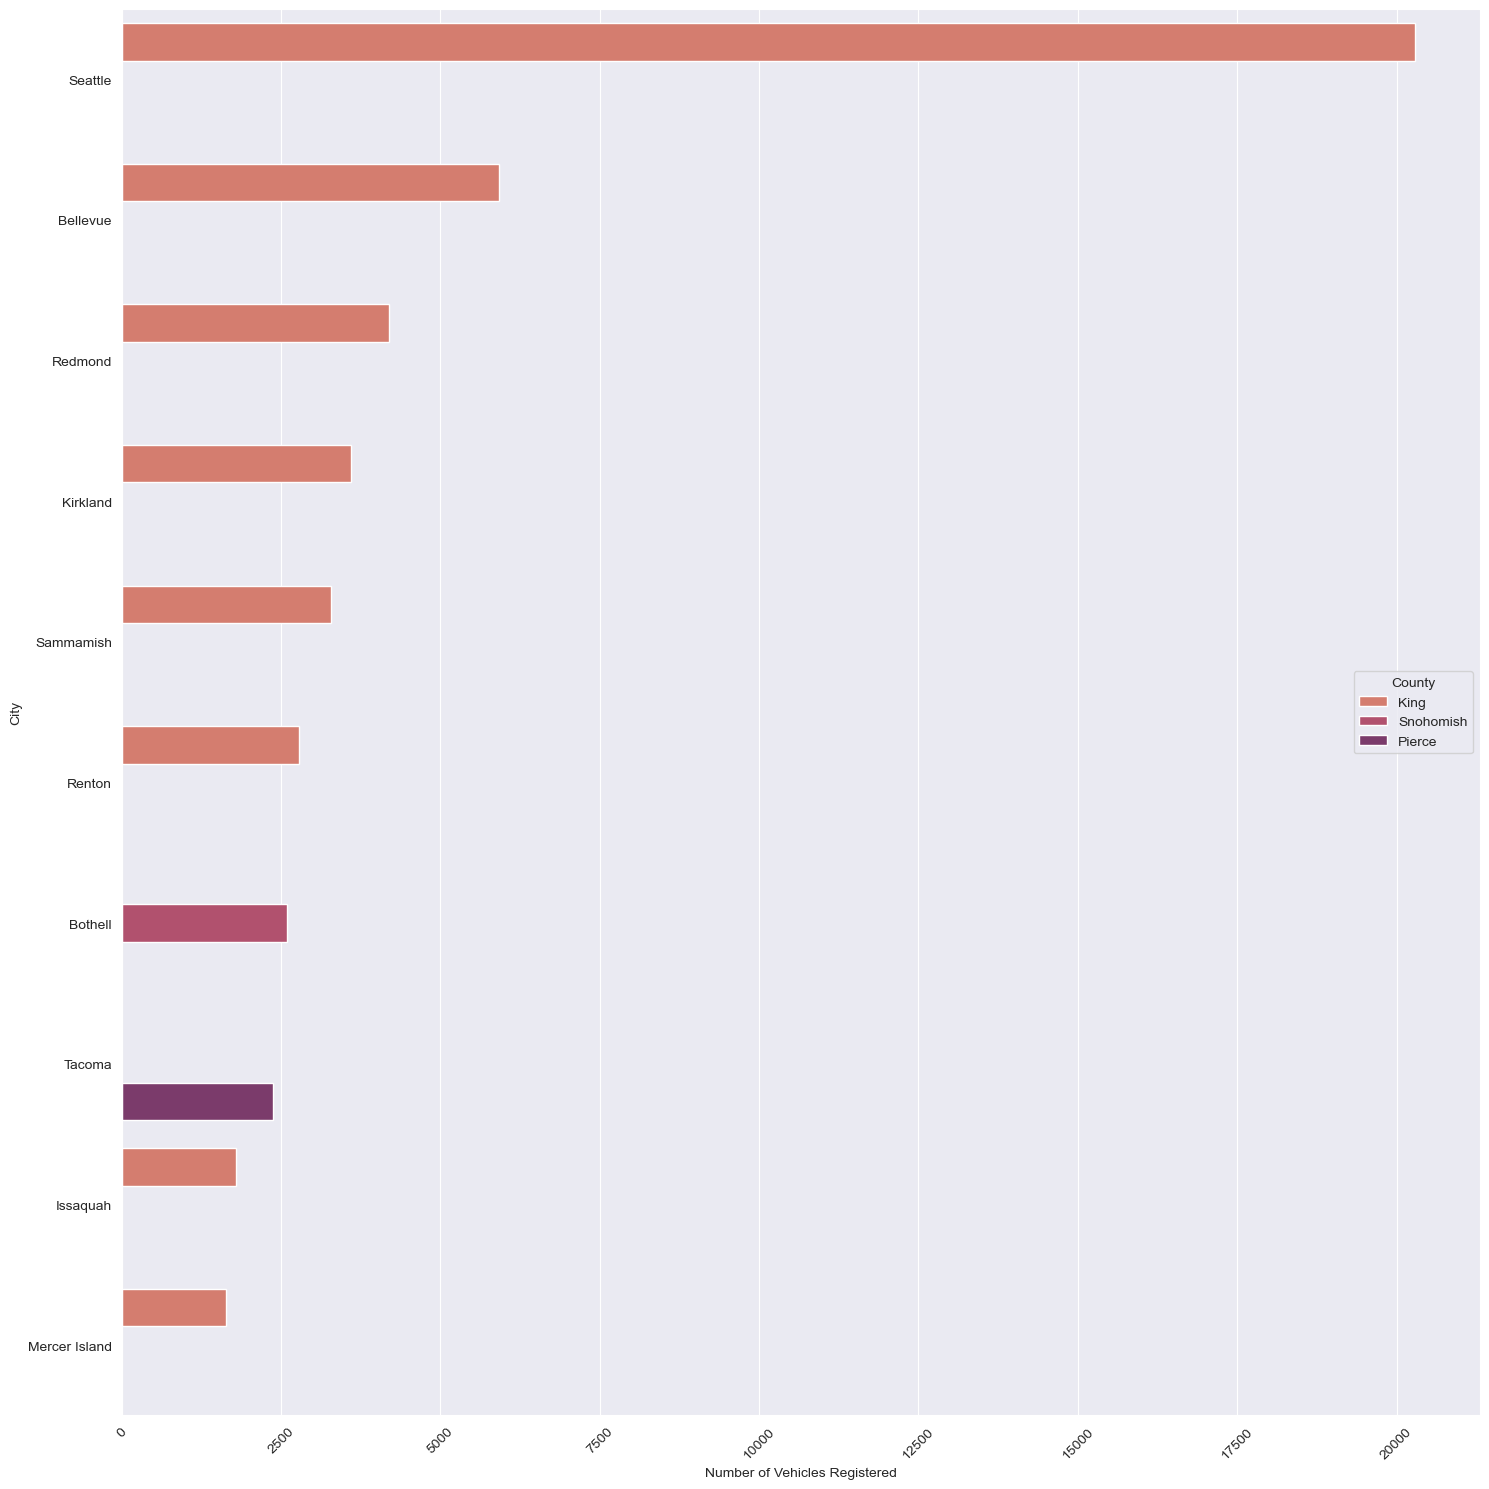

In [19]:
# Visualize top 15 cities
plt.figure(figsize=(15, 15))
sns.barplot(x = "Number of Vehicles", y = "City", hue="County", data=top_10, palette='flare')
plt.xlabel("Number of Vehicles Registered")
plt.ylabel('City')
plt.xticks(rotation=45)
plt.legend(title='County')
plt.tight_layout()
plt.show()

the types of electric vehicles represented in this dataset. Understanding the breakdown between different EV types, such as Battery Electric Vehicles (BEV) and Plug-in Hybrid Electric Vehicles (PHEV), can provide insights into consumer preferences and the adoption patterns of purely electric vs. hybrid electric solutions.

In [20]:
ev_data_cleaned["Electric Vehicle Type"].value_counts()

Electric Vehicle Type
Battery Electric Vehicle (BEV)            85732
Plug-in Hybrid Electric Vehicle (PHEV)    26420
Name: count, dtype: int64

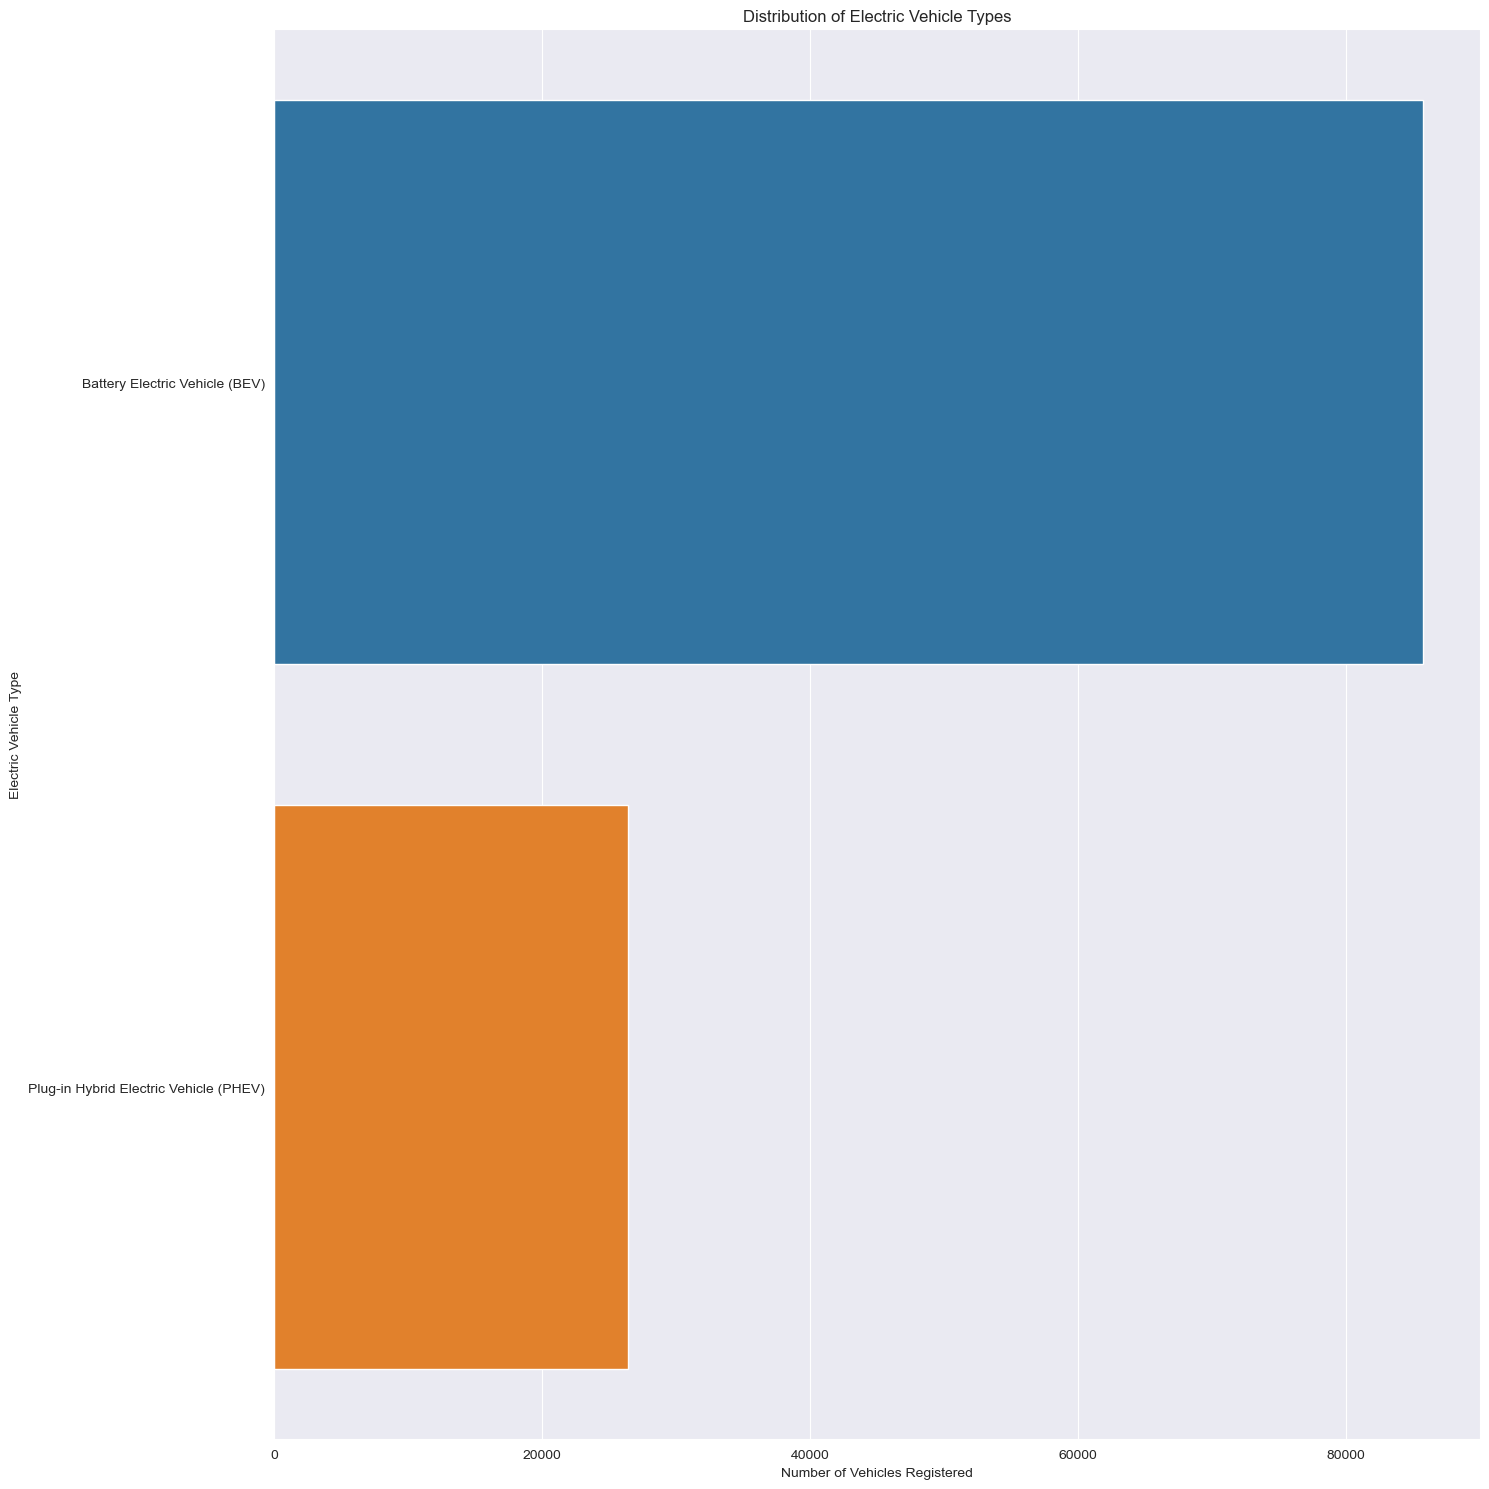

In [23]:
plt.figure(figsize=(15,15))
sns.barplot(x=ev_data_cleaned["Electric Vehicle Type"].value_counts().values, y=ev_data_cleaned["Electric Vehicle Type"].value_counts().index)
plt.title("Distribution of Electric Vehicle Types")
plt.ylabel("Electric Vehicle Type")
plt.xlabel("Number of Vehicles Registered")
plt.tight_layout()
plt.show()

the most popular manufacturers

In [33]:
ev_data_cleaned["Make"].value_counts()

Make
TESLA             51883
NISSAN            12846
CHEVROLET         10140
FORD               5780
BMW                4660
KIA                4469
TOYOTA             4368
VOLKSWAGEN         2507
AUDI               2320
VOLVO              2256
CHRYSLER           1780
HYUNDAI            1407
JEEP               1143
RIVIAN              883
FIAT                820
PORSCHE             817
HONDA               788
MINI                631
MITSUBISHI          585
POLESTAR            557
MERCEDES-BENZ       503
SMART               271
JAGUAR              218
LINCOLN             167
CADILLAC            108
LUCID MOTORS         65
SUBARU               59
LAND ROVER           38
LEXUS                33
FISKER               19
GENESIS              18
AZURE DYNAMICS        7
TH!NK                 3
BENTLEY               3
Name: count, dtype: int64

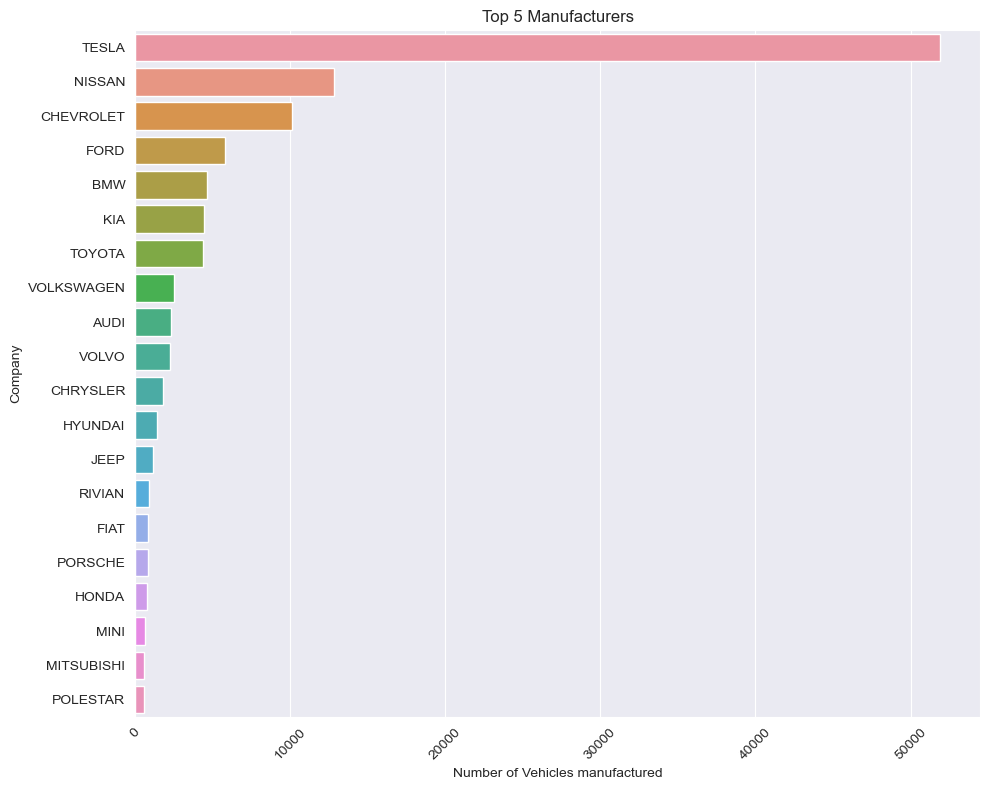

In [35]:
plt.figure(figsize=(10,8))
sns.barplot(x=ev_data_cleaned["Make"].value_counts().head(20).values, y=ev_data_cleaned["Make"].value_counts().head(20).index)
plt.title("Top 5 Manufacturers")
plt.xlabel('Number of Vehicles manufactured')
plt.ylabel('Company')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

most popular models within these top manufacturers

In [42]:
ev_data_cleaned["Make"].value_counts().head(5).index

Index(['TESLA', 'NISSAN', 'CHEVROLET', 'FORD', 'BMW'], dtype='object', name='Make')

In [39]:
top_5 = ev_data_cleaned["Make"].value_counts().head(5).index

In [40]:
top_5_data = ev_data_cleaned[ev_data_cleaned["Make"].isin(top_5)]

In [41]:
top_5_data.head(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500
5,5YJ3E1EB5J,Snohomish,Bothell,WA,98021,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,1.0,475635324,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,53061051916
6,1N4AZ0CP4D,Snohomish,Everett,WA,98203,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,38.0,253546023,POINT (-122.23019 47.94949),PUGET SOUND ENERGY INC,53061040900


In [49]:
top_5_data.groupby(["Make", "Model"]).size().sort_values(ascending=False).reset_index(name="Counts").head(5)

,Make,Model,Counts
0,TESLA,MODEL 3,23042
1,TESLA,MODEL Y,17086
2,NISSAN,LEAF,12846
3,TESLA,MODEL S,7346
4,CHEVROLET,BOLT EV,4895


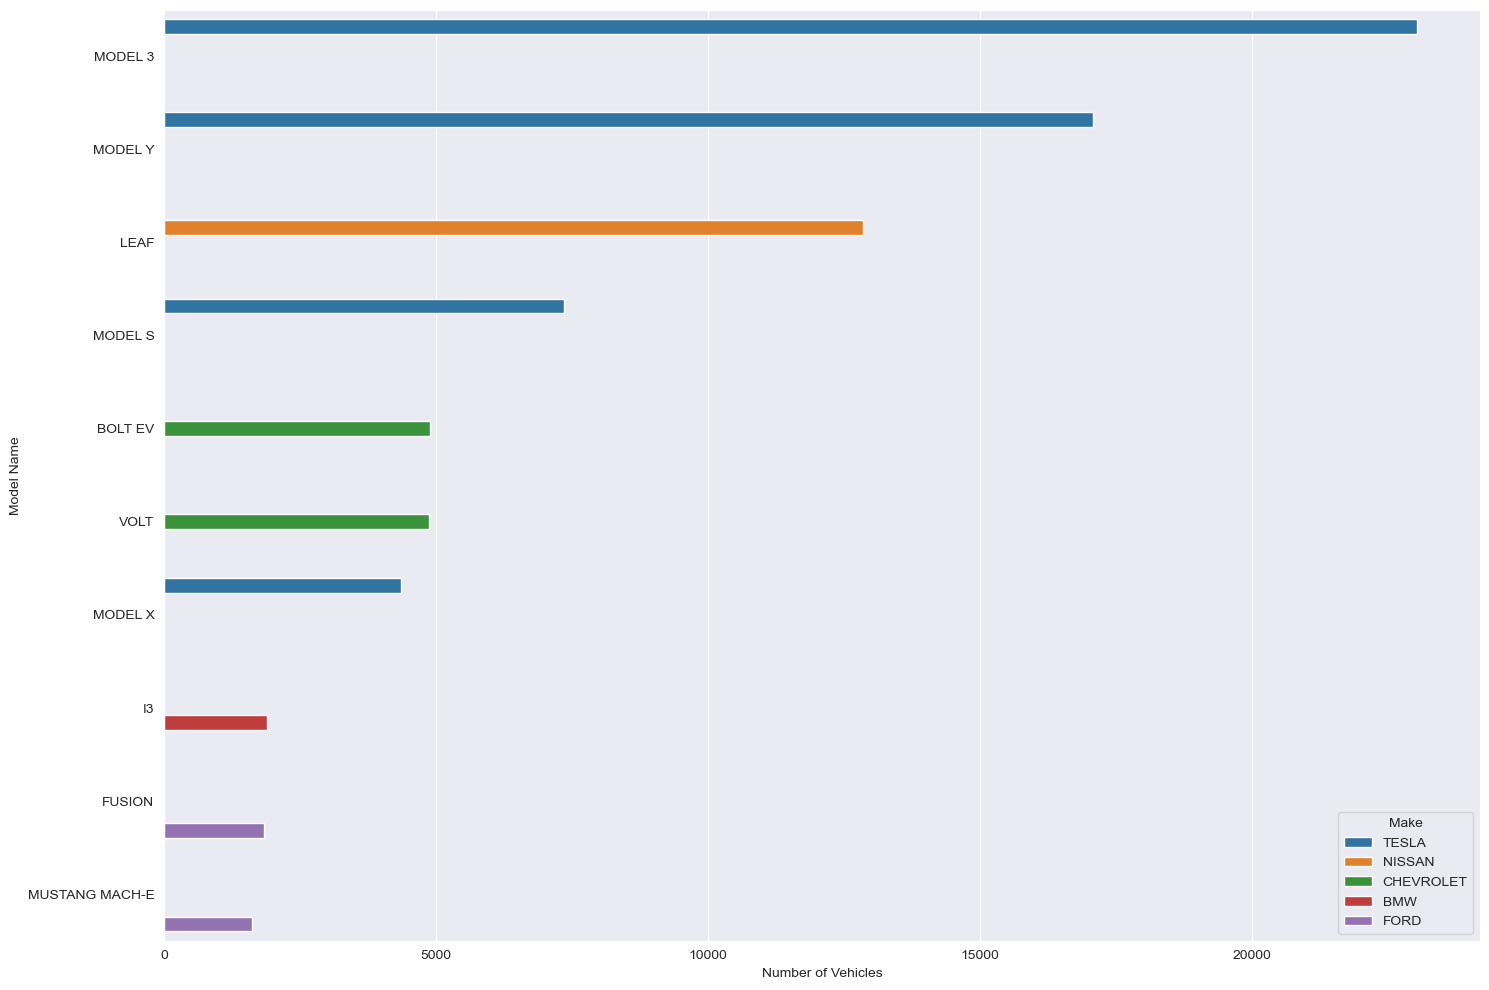

In [53]:
data_ = top_5_data.groupby(["Make", "Model"]).size().sort_values(ascending=False).reset_index(name="Counts")

# Plotting
plt.figure(figsize=(15,10))
sns.barplot(y="Model", x="Counts", hue="Make", data=data_.head(10))
plt.ylabel("Model Name")
plt.xlabel("Number of Vehicles")
plt.tight_layout()
plt.show()

Explore the electric range of vehicles, which is a critical factor for analyzing the market size of electric vehicles. The electric range indicates how far an EV can travel on a single charge, and advancements in battery technology have been steadily increasing these ranges over the years.

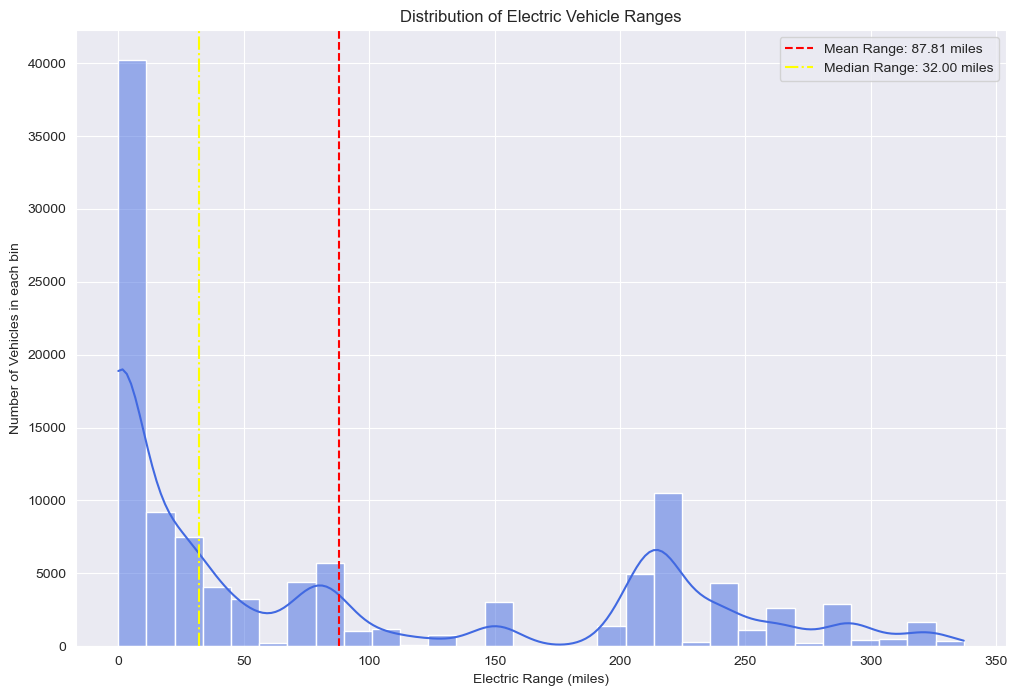

In [57]:
plt.figure(figsize=(12,8))
sns.histplot(ev_data_cleaned["Electric Range"], bins=30, kde=True, color='royalblue')
plt.xlabel("Electric Range (miles)")
plt.ylabel("Number of Vehicles in each bin")
plt.title("Distribution of Electric Vehicle Ranges")
plt.axvline(ev_data_cleaned['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean Range: {ev_data["Electric Range"].mean():.2f} miles')
plt.axvline(ev_data_cleaned['Electric Range'].median(), color='yellow', linestyle='-.', label=f'Median Range: {ev_data["Electric Range"].median():.2f} miles')
plt.legend()
plt.show()

the trend of electric ranges over model years

In [96]:
ev_data_cleaned.groupby('Model Year')["Electric Range"].value_counts()

Model Year  Electric Range
1997        39                   1
1998        58                   1
1999        74                   3
2000        58                  10
2002        95                   2
                              ... 
2022        15                   2
2023        0                 1813
            34                  42
            17                   4
            21                   4
Name: count, Length: 267, dtype: int64

In [78]:
ev_data_cleaned.groupby('Model Year')["Electric Range"].mean().reset_index()

,Model Year,Electric Range
0,1997,39.000000
1,1998,58.000000
2,1999,74.000000
3,2000,58.000000
4,2002,95.000000
5,2008,220.000000
6,2010,245.000000
7,2011,71.271856
8,2012,61.834218
9,2013,81.135789


In [82]:
data_ = ev_data_cleaned.groupby('Model Year')["Electric Range"].mean().reset_index()

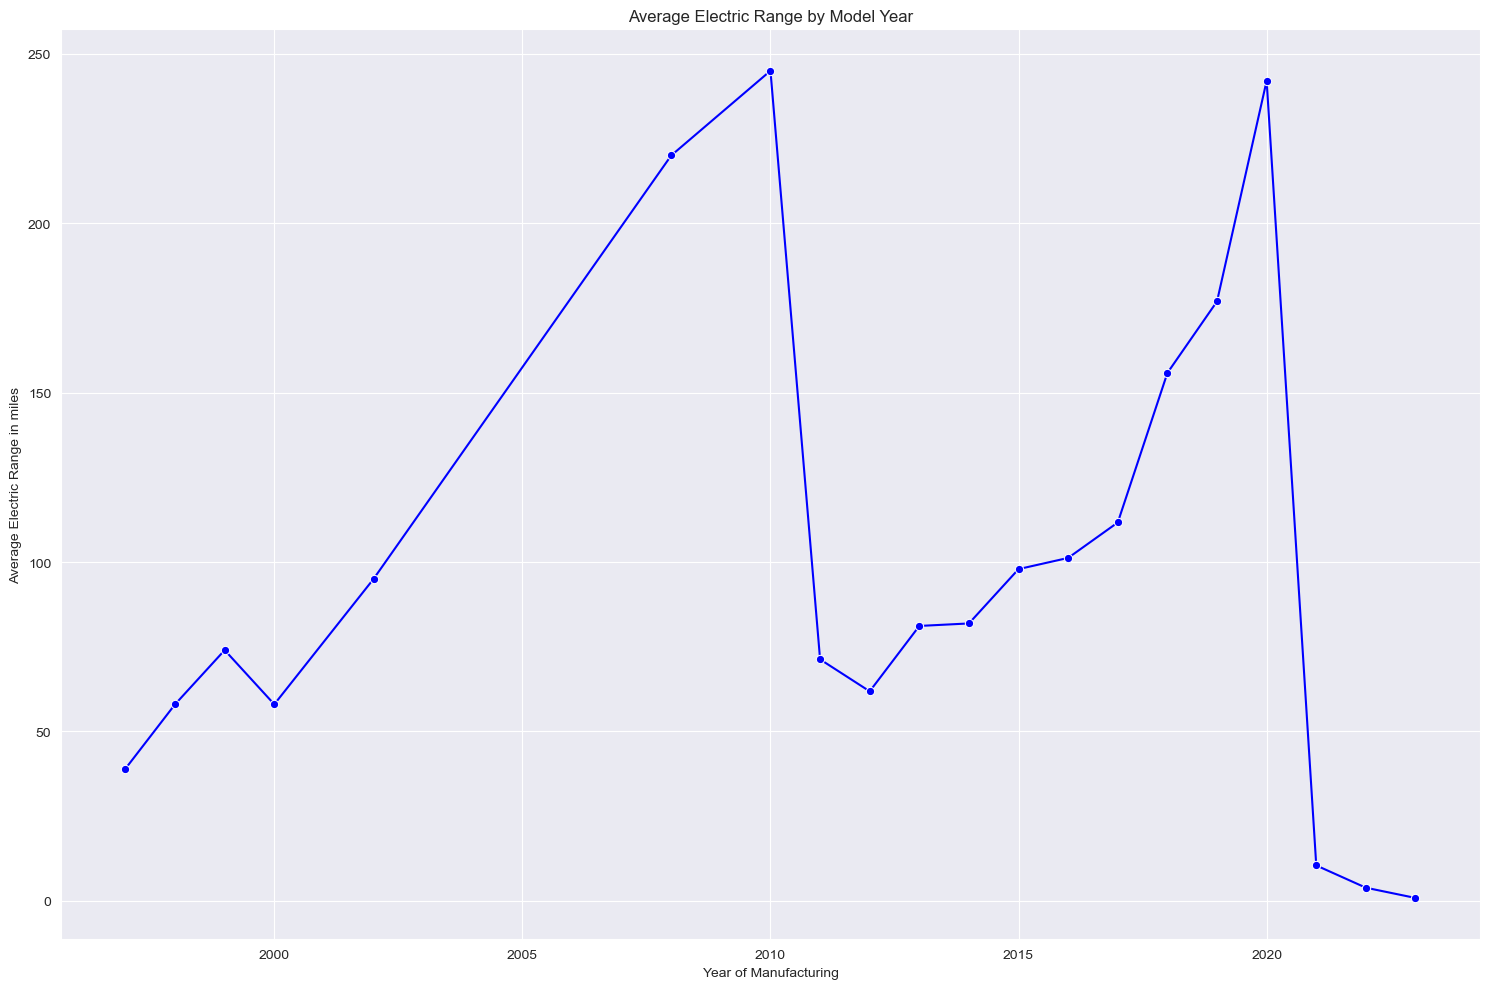

In [89]:
data_ = ev_data_cleaned.groupby('Model Year')["Electric Range"].mean().reset_index()

plt.figure(figsize=(15,10))
sns.lineplot(x="Model Year", y="Electric Range", data=data_, marker='o', color='blue')
plt.xlabel("Year of Manufacturing")
plt.ylabel("Average Electric Range in miles")
plt.title("Average Electric Range by Model Year")
plt.grid(True)
plt.tight_layout()
plt.show()

Explore how electric ranges vary among the top manufacturers and models.

In [113]:
ev_data_cleaned.groupby(["Make", "Model"])["Electric Range"].mean().sort_values(ascending=False).reset_index(name="Average Electric Range")

,Make,Model,Average Electric Range
0,HYUNDAI,KONA,258.000000
1,TESLA,ROADSTER,234.351852
2,JAGUAR,I-PACE,207.165138
3,TESLA,MODEL S,189.448407
4,TESLA,MODEL X,178.525603
...,...,...,...
109,FORD,MUSTANG MACH-E,0.000000
110,FORD,TRANSIT,0.000000
111,GENESIS,G80,0.000000
112,GENESIS,GV60,0.000000


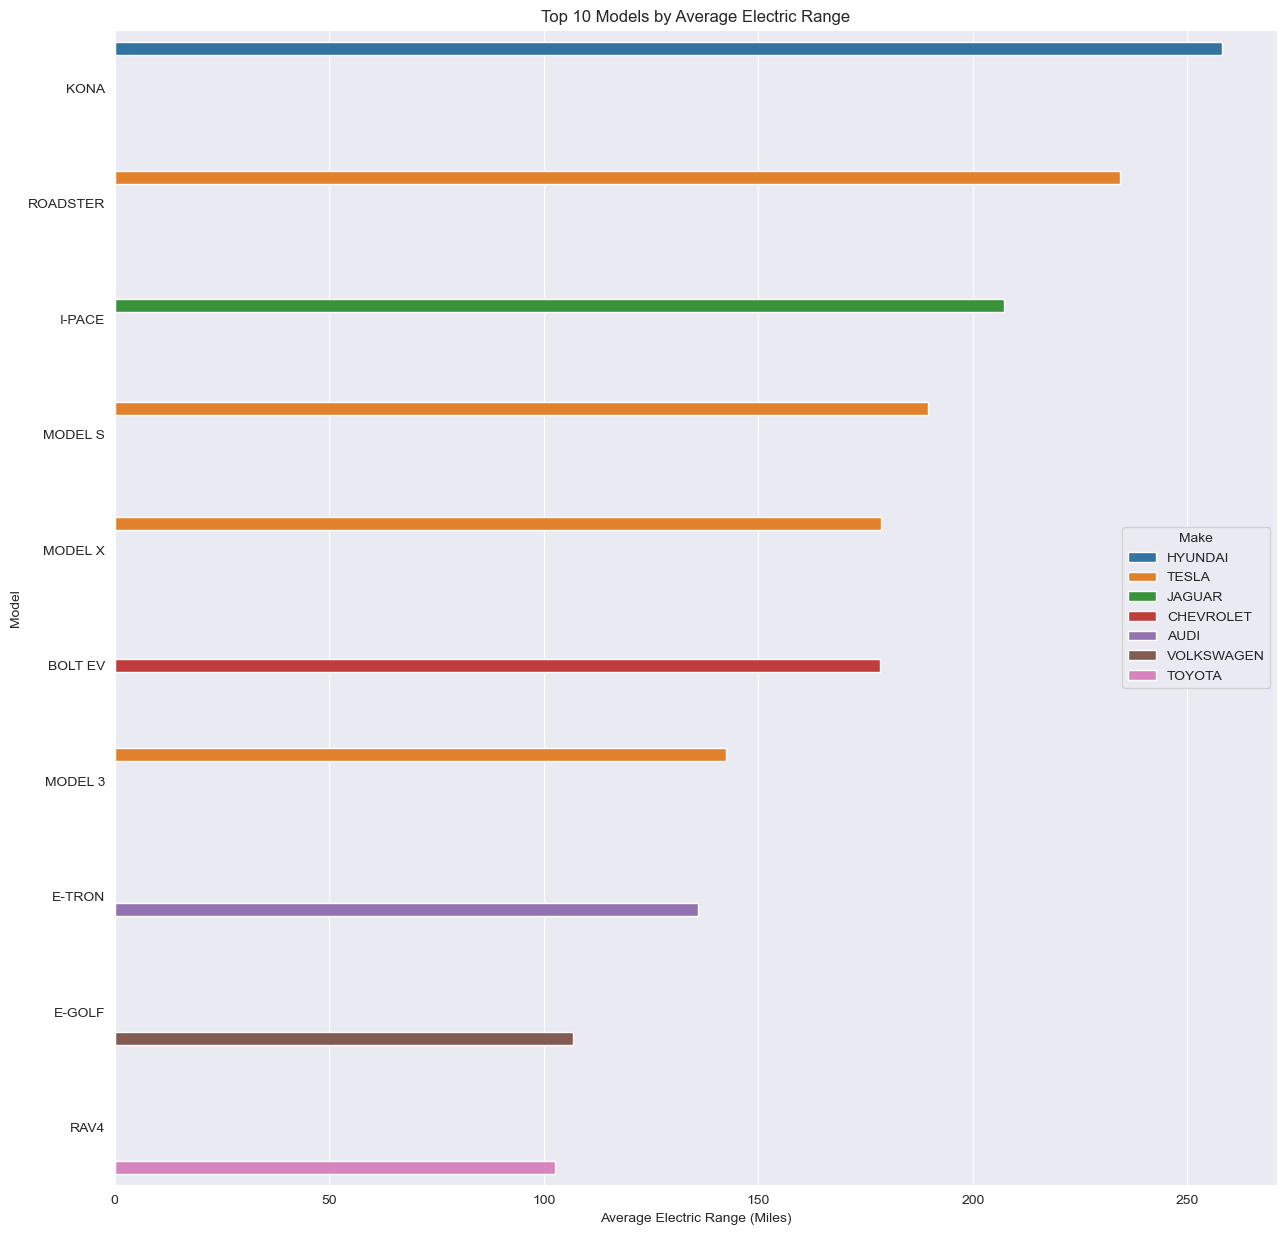

In [115]:
top_10 = ev_data_cleaned.groupby(["Make", "Model"])["Electric Range"].mean().sort_values(ascending=False).reset_index(name="Average Electric Range")

plt.figure(figsize=(15,15))
sns.barplot(x="Average Electric Range", y="Model", hue="Make", data=top_10.head(10))
plt.title("Top 10 Models by Average Electric Range")
plt.xlabel("Average Electric Range (Miles)")
plt.ylabel("Model")
plt.legend(title='Make', loc='center right')
plt.show()

# Estimated Market Size Analysis of Electric Vehicles in the United States

In [193]:
ev_data_cleaned["Model Year"].value_counts().sort_values(ascending=False).reset_index(name="Number of Vehicles").head(5)

,Model Year,Number of Vehicles
0,2022,26455
1,2021,18277
2,2018,14190
3,2020,10998
4,2019,10216


In [194]:
ev_data_cleaned["Model Year"].value_counts().sort_index()

Model Year
1997        1
1998        1
1999        3
2000       10
2002        2
2008       23
2010       24
2011      835
2012     1695
2013     4669
2014     3665
2015     4918
2016     5709
2017     8598
2018    14190
2019    10216
2020    10998
2021    18277
2022    26455
2023     1863
Name: count, dtype: int64

In [195]:
# calculate the number of EVs registered each year
ev_reg_counts = ev_data_cleaned["Model Year"].value_counts().sort_index()

In [196]:
ev_reg_counts

Model Year
1997        1
1998        1
1999        3
2000       10
2002        2
2008       23
2010       24
2011      835
2012     1695
2013     4669
2014     3665
2015     4918
2016     5709
2017     8598
2018    14190
2019    10216
2020    10998
2021    18277
2022    26455
2023     1863
Name: count, dtype: int64

To forecast the total number of EVs expected to be registered in 2024, we can use a growth rate based approach from previous complete years.

We’ll calculate the Compound Annual Growth Rate (CAGR) between a recent year with complete data (2023) and an earlier year to project the 2024 figures. Additionally, using this growth rate, we can estimate the market size for the next five years. Let’s proceed with these calculations:

In [197]:
filtered_data = ev_reg_counts[ev_reg_counts.index <= 2022]

In [198]:
filtered_data.index - filtered_data.index.min()

Index([0, 1, 2, 3, 5, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], dtype='int64', name='Model Year')

In [199]:
X = filtered_data.index - filtered_data.index.min()

In [200]:
len(X) # Years

19

In [201]:
X

Index([0, 1, 2, 3, 5, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], dtype='int64', name='Model Year')

In [202]:
Y = filtered_data.values

In [203]:
len(Y) # Number of vehicles that grows

19

In [204]:
Y

array([    1,     1,     3,    10,     2,    23,    24,   835,  1695,
        4669,  3665,  4918,  5709,  8598, 14190, 10216, 10998, 18277,
       26455], dtype=int64)

In [205]:
np.arange(2023,2030) - filtered_data.index.min()

array([26, 27, 28, 29, 30, 31, 32])

In [206]:
from scipy.optimize import curve_fit
import numpy as np

# filter => only choose the year that is not more than 2023
filtered_data = ev_reg_counts[ev_reg_counts.index <= 2022]

# define a function for exponential growth to fit the data
def exp_growth(x,a,b):
    return a * np.exp(b*x) # Like in Finance P*(e**(r*t))

# prepare the data for curve fitting
X = filtered_data.index - filtered_data.index.min() 
#[0, 1, 2, 3, 5, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
Y = filtered_data.values

# fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, X, Y) # In Finance, X is principal money (initial investment), Y is r (interest rates)

# use the fitted function to forecase the number of EVs from 2024 to 2030
forecast_years = np.arange(2023, 2030) - filtered_data.index.min() #array([26, 27, 28, 29, 30, 31, 32])
forecast_values = exp_growth(forecast_years, *params) # forecast_years is t (years) in finance

# create a dictionary to display the forcasted values
forecasted_evs = dict(zip(forecast_years + filtered_data.index.min(), forecast_values))

In [207]:
print(forecasted_evs)

{2023: 30997.065232248577, 2024: 39328.502647774854, 2025: 49899.27623557252, 2026: 63311.27811129238, 2027: 80328.17785096326, 2028: 101918.90527803243, 2029: 129312.82061874864}


In [208]:
forecasted_evs[2024]

39328.502647774854

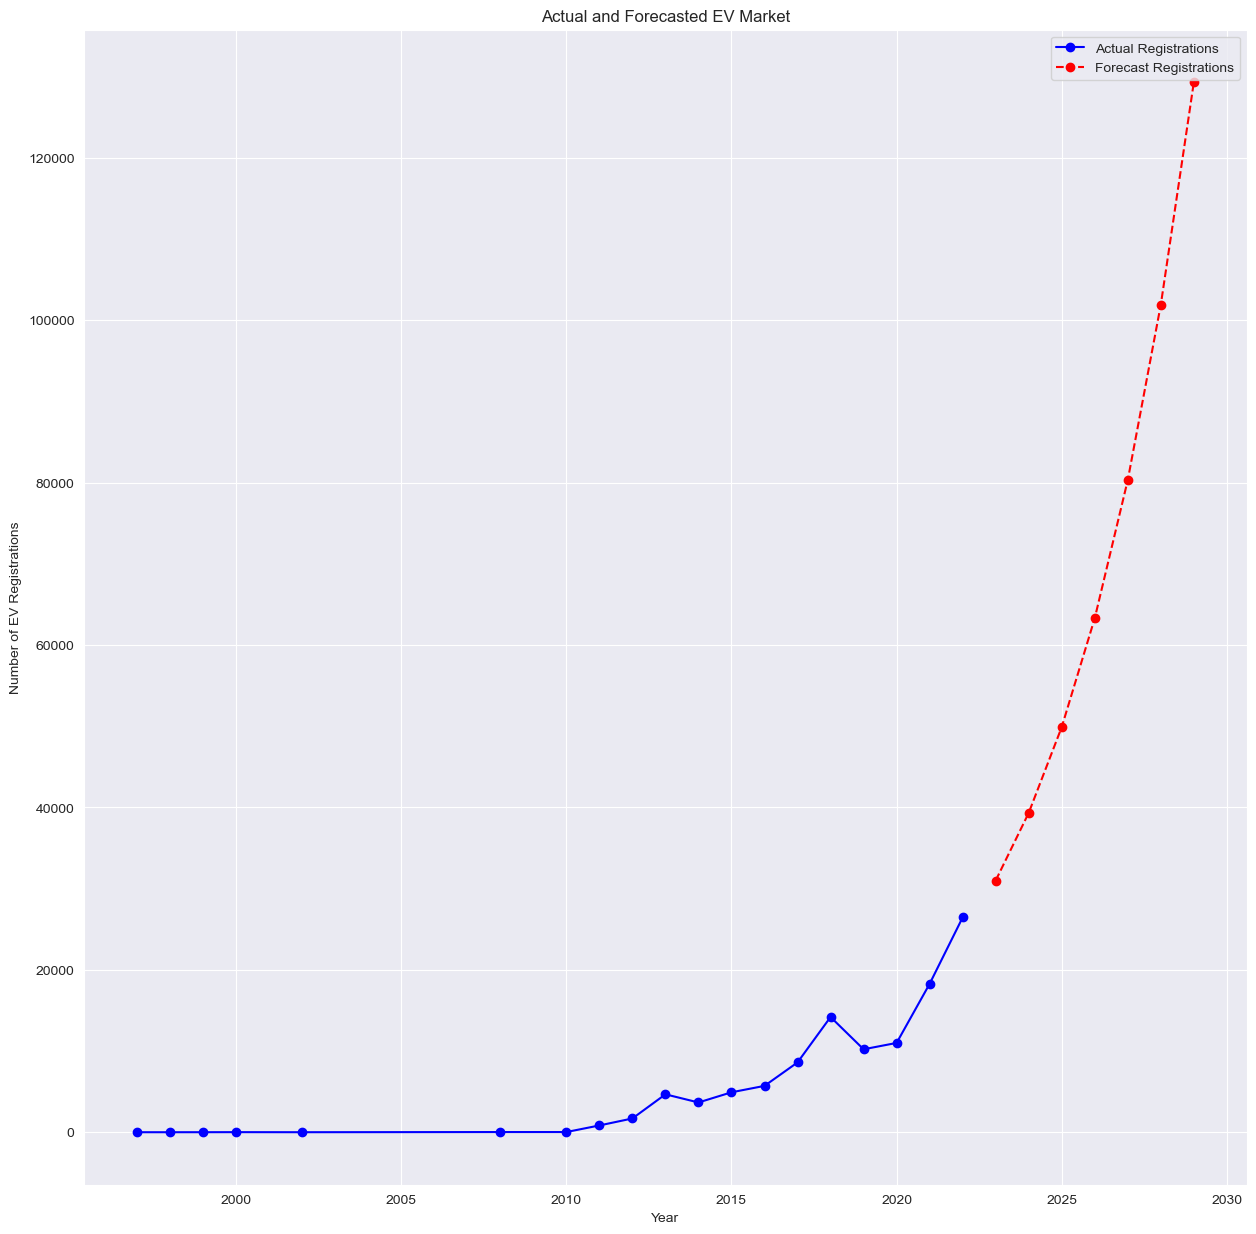

In [210]:
# Plotting

# Actual Years and Forecast Years
years = np.arange(filtered_data.index.min(), 2030)
actual_years = filtered_data.index
forecast_years_full = np.arange(2023,2030)

# Actual Values and Forecast Values
actual_values = filtered_data.values
forecast_values_full = [forecasted_evs[years] for years in forecast_years_full]

plt.figure(figsize=(15,15))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full, forecast_values_full, 'ro--', label='Forecast Registrations')

plt.title("Actual and Forecasted EV Market")
plt.xlabel("Year")
plt.ylabel("Number of EV Registrations")
plt.legend()
plt.grid(True)
plt.show()

Reference: https://thecleverprogrammer.com/2024/03/18/electric-vehicles-market-size-analysis-using-python/

In [211]:
# The End